# Data & Sampling Distributions

Random Sampling

sample - portion of data that is usually taken when it is too difficult to process the whole data set.

For example, click stream data 

population - totality of the dataset

random sampling - randomly picking portions of population

stratified sampling -- stratify and then pick portions eg: sampling population by age

bias - error

sampling bias - sample that mis represents the population

$\bar x$   - mean of sample
mu - mean of population

**selection bias**

-- bias that arises from how the observations in the data are selected 

Data snooping -- looking through data to find something useful

vast serach effect -- over searching data can result in finding outliers as potential features

target shuffling -- a method to overcome vast search effect

**sampling distribution of a statistic** - calculating statistics of the sample




In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players.csv")

In [3]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [5]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


### Central Limit Theorem

- it says that the means of samples drawn from the data when plotted will resemble a bell shaped normal curve 

In [6]:
##demonstrating central limit theorem on the nfl dataset
##cleaning the heights 

In [21]:
players["height"].apply(lambda x:x.split("-"))

0        [6, 1]
1        [6, 0]
2        [6, 0]
3        [6, 1]
4        [6, 1]
         ...   
2727     [6, 3]
2728     [6, 3]
2729     [5, 9]
2730       [73]
2731    [5, 10]
Name: height, Length: 2732, dtype: object

In [20]:
players["height"].apply(lambda x:int(x.split("-")[0])*12+ int(x.split("-")[1]) if len(x.split("-")) ==2 else int(x.split("-")[0]))

0       73
1       72
2       72
3       73
4       73
        ..
2727    75
2728    75
2729    69
2730    73
2731    70
Name: height, Length: 2732, dtype: int64

In [22]:
players["height(inches)"] =players["height"].apply(lambda x:int(x.split("-")[0])*12+ int(x.split("-")[1]) if len(x.split("-")) ==2 else int(x.split("-")[0]))

In [23]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,height(inches)
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73


In [29]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nflId           2732 non-null   int64 
 1   height          2732 non-null   object
 2   weight          2732 non-null   int64 
 3   birthDate       2715 non-null   object
 4   collegeName     2724 non-null   object
 5   Position        2732 non-null   object
 6   displayName     2732 non-null   object
 7   height(inches)  2732 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 170.9+ KB


In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Central Limit Theorem on players heights')

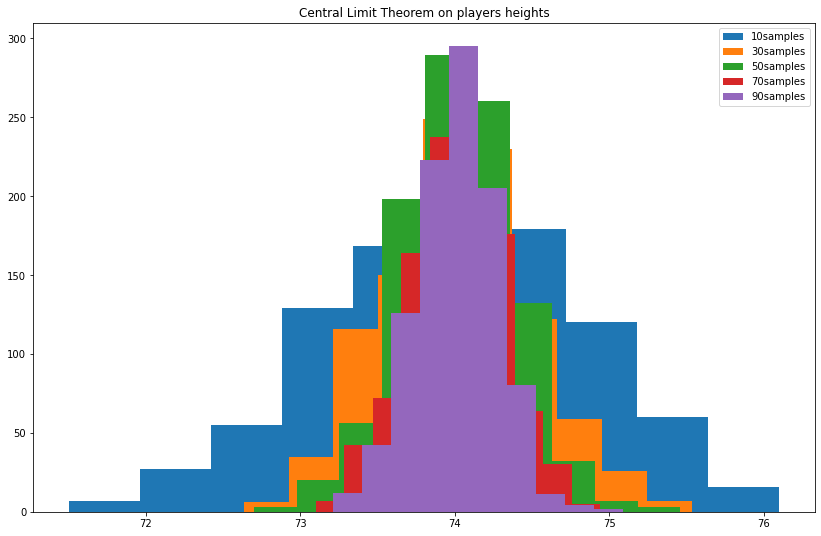

In [37]:
sample_amounts = range(10,100,20)

plt.figure(figsize=(14,9))

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(players["height(inches)"].sample(x).mean())
    plt.hist(samples)
    

    
plt.legend([str(z)+"samples" for z in sample_amounts])
plt.title("Central Limit Theorem on players heights")

In [34]:
players["height(inches)"].sample(10).mean()

73.9

**Note:** Notice from the above samples distribution that all of samples are converging on what seems to be the population mean (73.9)

**standard error**: it is a single metric that sums up the variability in a sampling distribution for a given statistic. It can be calculated by using standard deviastion - s and the number of values in the sample - n  

SE = s/sqrt(n)

As the number of samples increases the SE decreases (intuitively)

SE in pandas is pd.series.sem()

In [38]:
players["height(inches)"].sem()

0.05065243293253027

In [40]:
players["height(inches)"].sample(20).sem()

0.530516133987509

In [41]:
players["height(inches)"].sample(60).sem()

0.37368728177105354

**Bootstrap Sampling** - this is a sampling method where you draw a sample and replace it back into the population and draw the next sampling from the pool. This means a single item can be drawn in any number of samples. This does not assume that the samples drawn are normally distributed 

It can be implemented using sklearn in python

In [42]:
from sklearn.utils import resample

In [43]:
results =[]

for i in range(1000):
    sample = resample(players["height(inches)"])
    results.append(sample.median())
    
results = pd.Series(results)
print("Bootstrap Statistics:\n")
print("original:\n", players["height(inches)"].median())
print("bias:\n", results.mean()-players["height(inches)"].median())
print("std error:\n",results.std())

Bootstrap Statistics:

original:
 74.0
bias:
 0.0
std error:
 0.0


In [44]:
results.sem()

0.0

In [ ]:
# data is too well distributed so keeps giving the same median - so use mean

In [45]:
results =[]

for i in range(1000):
    sample = resample(players["height(inches)"])
    results.append(sample.mean()) #changing median to mean
    
results = pd.Series(results)
print("Bootstrap Statistics:\n")
print("original:\n", players["height(inches)"].median())
print("bias:\n", results.mean()-players["height(inches)"].median())
print("std error:\n",results.std())

Bootstrap Statistics:

original:
 74.0
bias:
 0.011275622254771633
std error:
 0.050574414703766314


### Confidence Interval

**Confidence Level**: is the percentage of confidence interval constructed in same way from same population that are expected to contain the statistic

**Confidence Interval**: interval that is bound by the limits - for 95% confidence interval, 2.5% of start tail and 2.5% of bottom tail are tapered off

CI can be calculated using the scipy library

when we have a sample of size less than 30, we use a t-distribution

greater than 30, we often assume its a normal distribution

In [46]:
import scipy.stats as st

In [48]:
# taking sample less than 30

data = players["height(inches)"][:20]

st.t.interval(alpha=0.95,df = len(data)-1,loc=np.mean(data),scale=st.sem(data))

(71.6396036490789, 74.26039635092111)

In [54]:
## for larger samples
np.random.seed(0)
data = players["height(inches)"][:150]

#creating 95% of confidence interval for height in inches
st.norm.interval(alpha=0.95,loc=np.mean(data),scale=st.sem(data))

(73.89789226690411, 74.74210773309588)

### Normal & Gaussian Distributions

**Error**: is the difference between an instance and the predicted average value

**Standardize**: Method of scaling data up or down

**Z score**:number of standard deviations above/below the mean a value is

**Q-Q Plots**: quantile quantile plots can be used to determine whether an sample is normally distributed. Thumb rule is if the qqplots are diagnolly aligned to upper right then the data is normally distributed. 

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

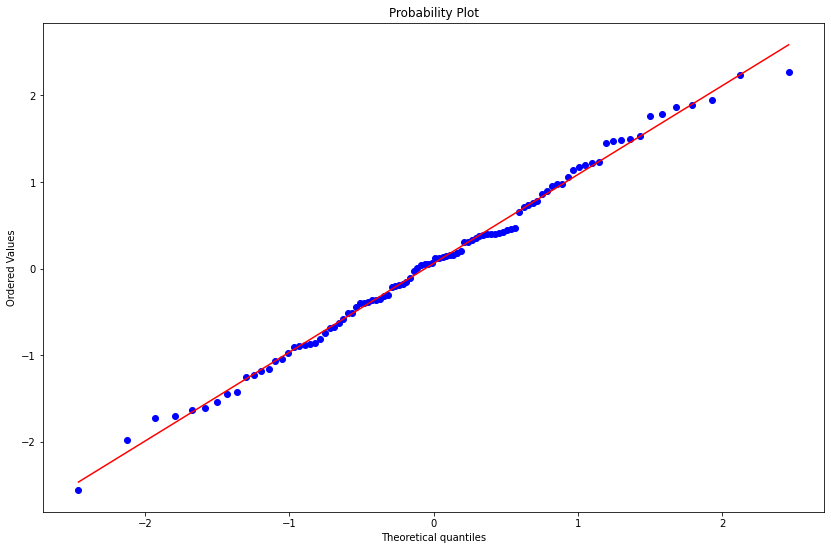

In [55]:
##qq plot
from scipy import stats
fig,ax = plt.subplots(figsize=(14,9))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample,plot=ax)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

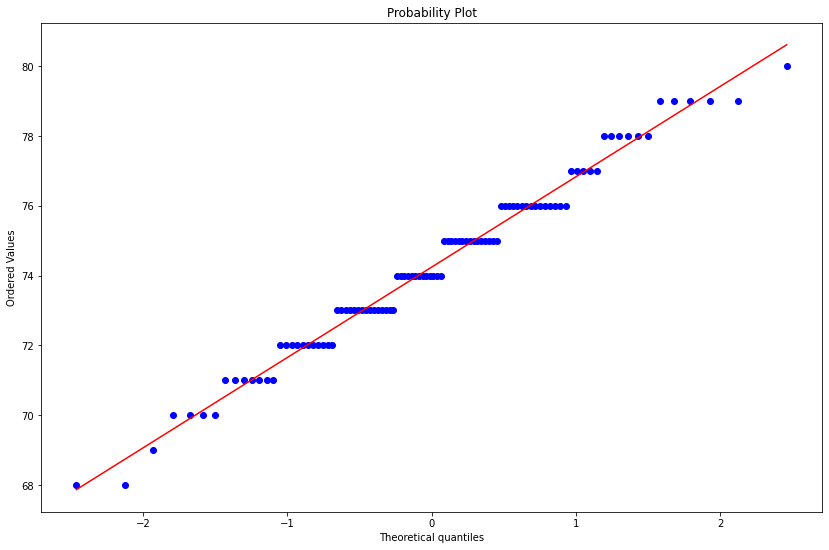

In [57]:
fig,ax = plt.subplots(figsize=(14,9))
norm_sample = players["height(inches)"].sample(100)
stats.probplot(norm_sample,plot=ax)

**Students t distribution**

These are sample normal distributions with thicker tails. As the sample size tends to increase they start to look more like normal distributions

**Binomial Distribution**

A lot of data science use cases follow binomial distributions like buy/dont buy, click/dont click etc

It can used to find out how many successes we can expect for given number of trials with a given success probability 

**PMF**

Probability mass functions tells us the probabilty that an event will happen a certain number of times given a certain number of samples and a probability for success

**CDF**

Cumulative Density Function tells us the probability that an event will happen certain number or fewer times 

pmf - exactly given number of times 

cdf - given number of times or less

In [61]:
stats.binom.pmf(2,n=5,p=0.1)

0.07289999999999992

 2- is the number of successes we are expecting
 
 5 - is number of trials being conducted
 
 p is probability of success
 
**example use case** - given a probability of user clicking on an add is 0.1, what is the probability of 2 users clicking on the ad for 5 trials 

In [59]:
stats.binom.cdf(2,n=5,p=0.1)

0.99144


### Additional reading:

Chi Square Distribution(Is a way of testing abnormality using significance test)

F distribution

ANOVA testing 

**Poisson distribution** : are used to simulate the probability of certain number of events happening in a given time or space, given that we know the average number of occurances of that event within a time or space. Each instance should be independent of the other instances

Example: call center calls - if we know that a call center receives 2 calls per minute, what is the number of calls received by the call center in each minute of a 100 minute interval.

Lambda =2

In [63]:
stats.poisson.rvs(2,100)

102

**Exponential Distribution**:

(Its opposite to Poisson distribution but use cases are similar)

It focuses on outputing the time between each occurance given a mean number of instances for a time period and a number of time periods to simulate

What is the number of minutes between each phone call in a 100 minute interval, given there are 0.2 phone calls per minute?

In [64]:
stats.expon.rvs(0.2,100)

82.85183032873852

**Weibull Distribution**

As opposed to Poisson and Exponential distribution which can only be used in use cases where each instance is independent of another, Weibull can be used for dependent instances. For example Engine failure data. 

It has a shape parameter (beta) - failure rates 


Number of failures that an engine will have over time?

In [66]:
#simulating 100 lifetimes with a shape of 1.5 and characteristic life of 5000

stats.weibull_min.rvs(1.5,scale=5000,size=100)

array([ 6911.32488658,  2277.57546563,  1211.25714879,  2730.23607334,
        5453.58846631,  5184.9658576 ,  7645.39560285,  9994.83264181,
        5385.54539679,  7851.34823122,  2264.25731235,  3494.7341971 ,
        2634.95151984,  6454.25959977,  6193.23470825,  3204.28886237,
        5321.70407459,   278.47546135,  8889.49741891,  3354.83365482,
        8881.89722057,   647.53772542,   983.60930738,  3915.21842827,
        1990.43469905,  5986.16842892,  5483.49538659,  4986.85161271,
        7504.60408494,  7601.60941236,  2318.30553177,  1981.97407423,
        5429.46425749,  1187.59849536,  1854.89170971,  8474.17204588,
        5093.94675434,  1815.3685788 ,  5501.88827364,  1747.62252339,
        5051.27492419,  1955.50417015,  5803.60193222, 12660.89545589,
        3852.3447566 ,  5276.94071392, 18790.97520709,  3205.29879746,
        7032.76231183,  1132.63993614,   259.24123037, 11245.36604789,
        4783.15147737,  2986.63506998,  3595.88776117,  1158.20812927,
      

*** To be continued***